              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       0.75      1.00      0.86         9
       drugX       1.00      0.81      0.89        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80

DecisionTrees's Accuracy:  0.95


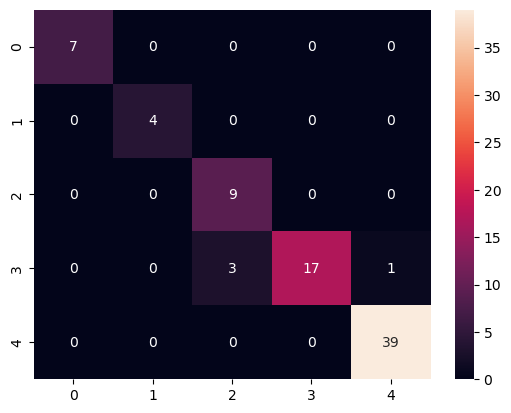

Classification Report: 
               precision    recall  f1-score   support

       drugA       0.92      1.00      0.96        23
       drugB       1.00      0.88      0.93        16
       drugC       1.00      1.00      1.00        16
       drugX       1.00      0.98      0.99        54
       drugY       0.99      1.00      0.99        91

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200



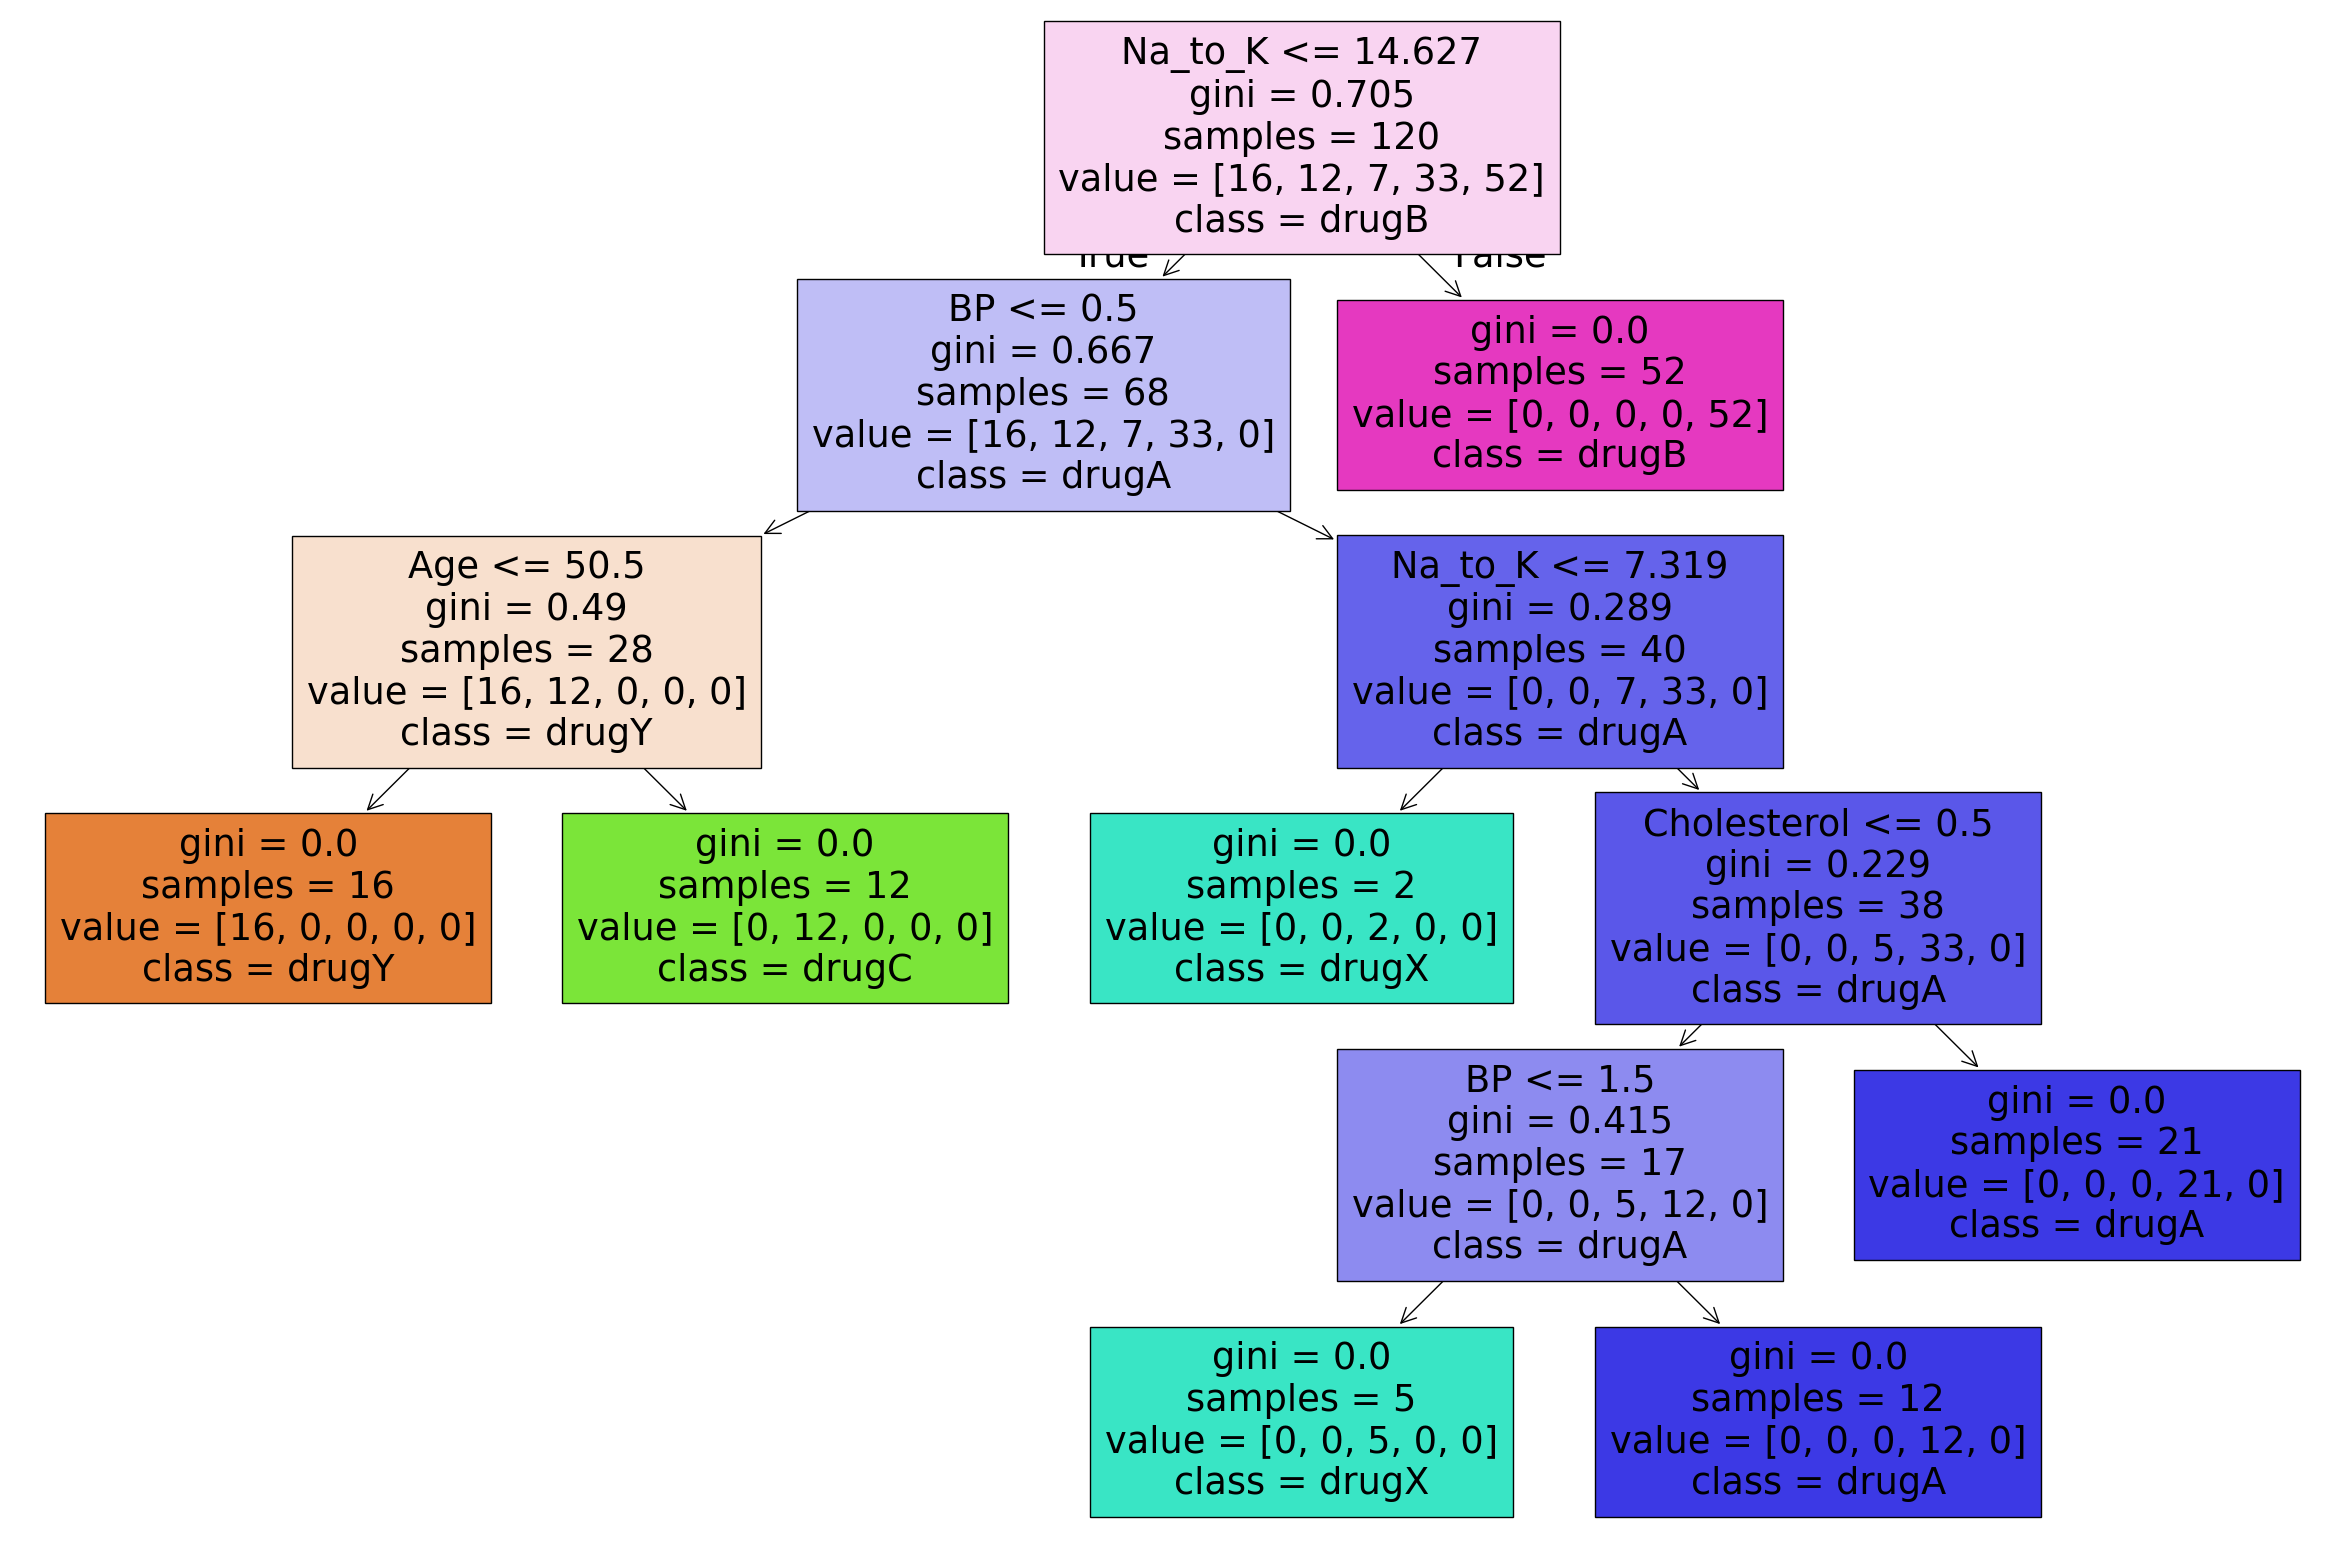

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
df = pd.read_csv(url)


encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'].values)
df['BP'] = encoder.fit_transform(df['BP'].values)
df['Cholesterol'] = encoder.fit_transform(df['Cholesterol'].values)
df.sample(10)




X = df[['Age','Sex','BP','Cholesterol','Na_to_K']].values
X[0:5]
y = df['Drug'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)




tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

y_predict=tree_model.predict(X_test)
print(classification_report(y_test, y_predict))
print("DecisionTrees's Accuracy: ", accuracy_score(y_test, y_predict))

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

# cross_validation
predict=cross_val_predict(estimator=tree_model,X=X,y=y,cv=5)
print("Classification Report: \n",classification_report(y, predict))



cols = df.drop('Drug', axis=1).columns
classes = df['Drug'].unique()
plt.figure(figsize=(30,20))
tree.plot_tree(tree_model,feature_names=cols,class_names=classes,filled=True)
plt.show()

0.8375


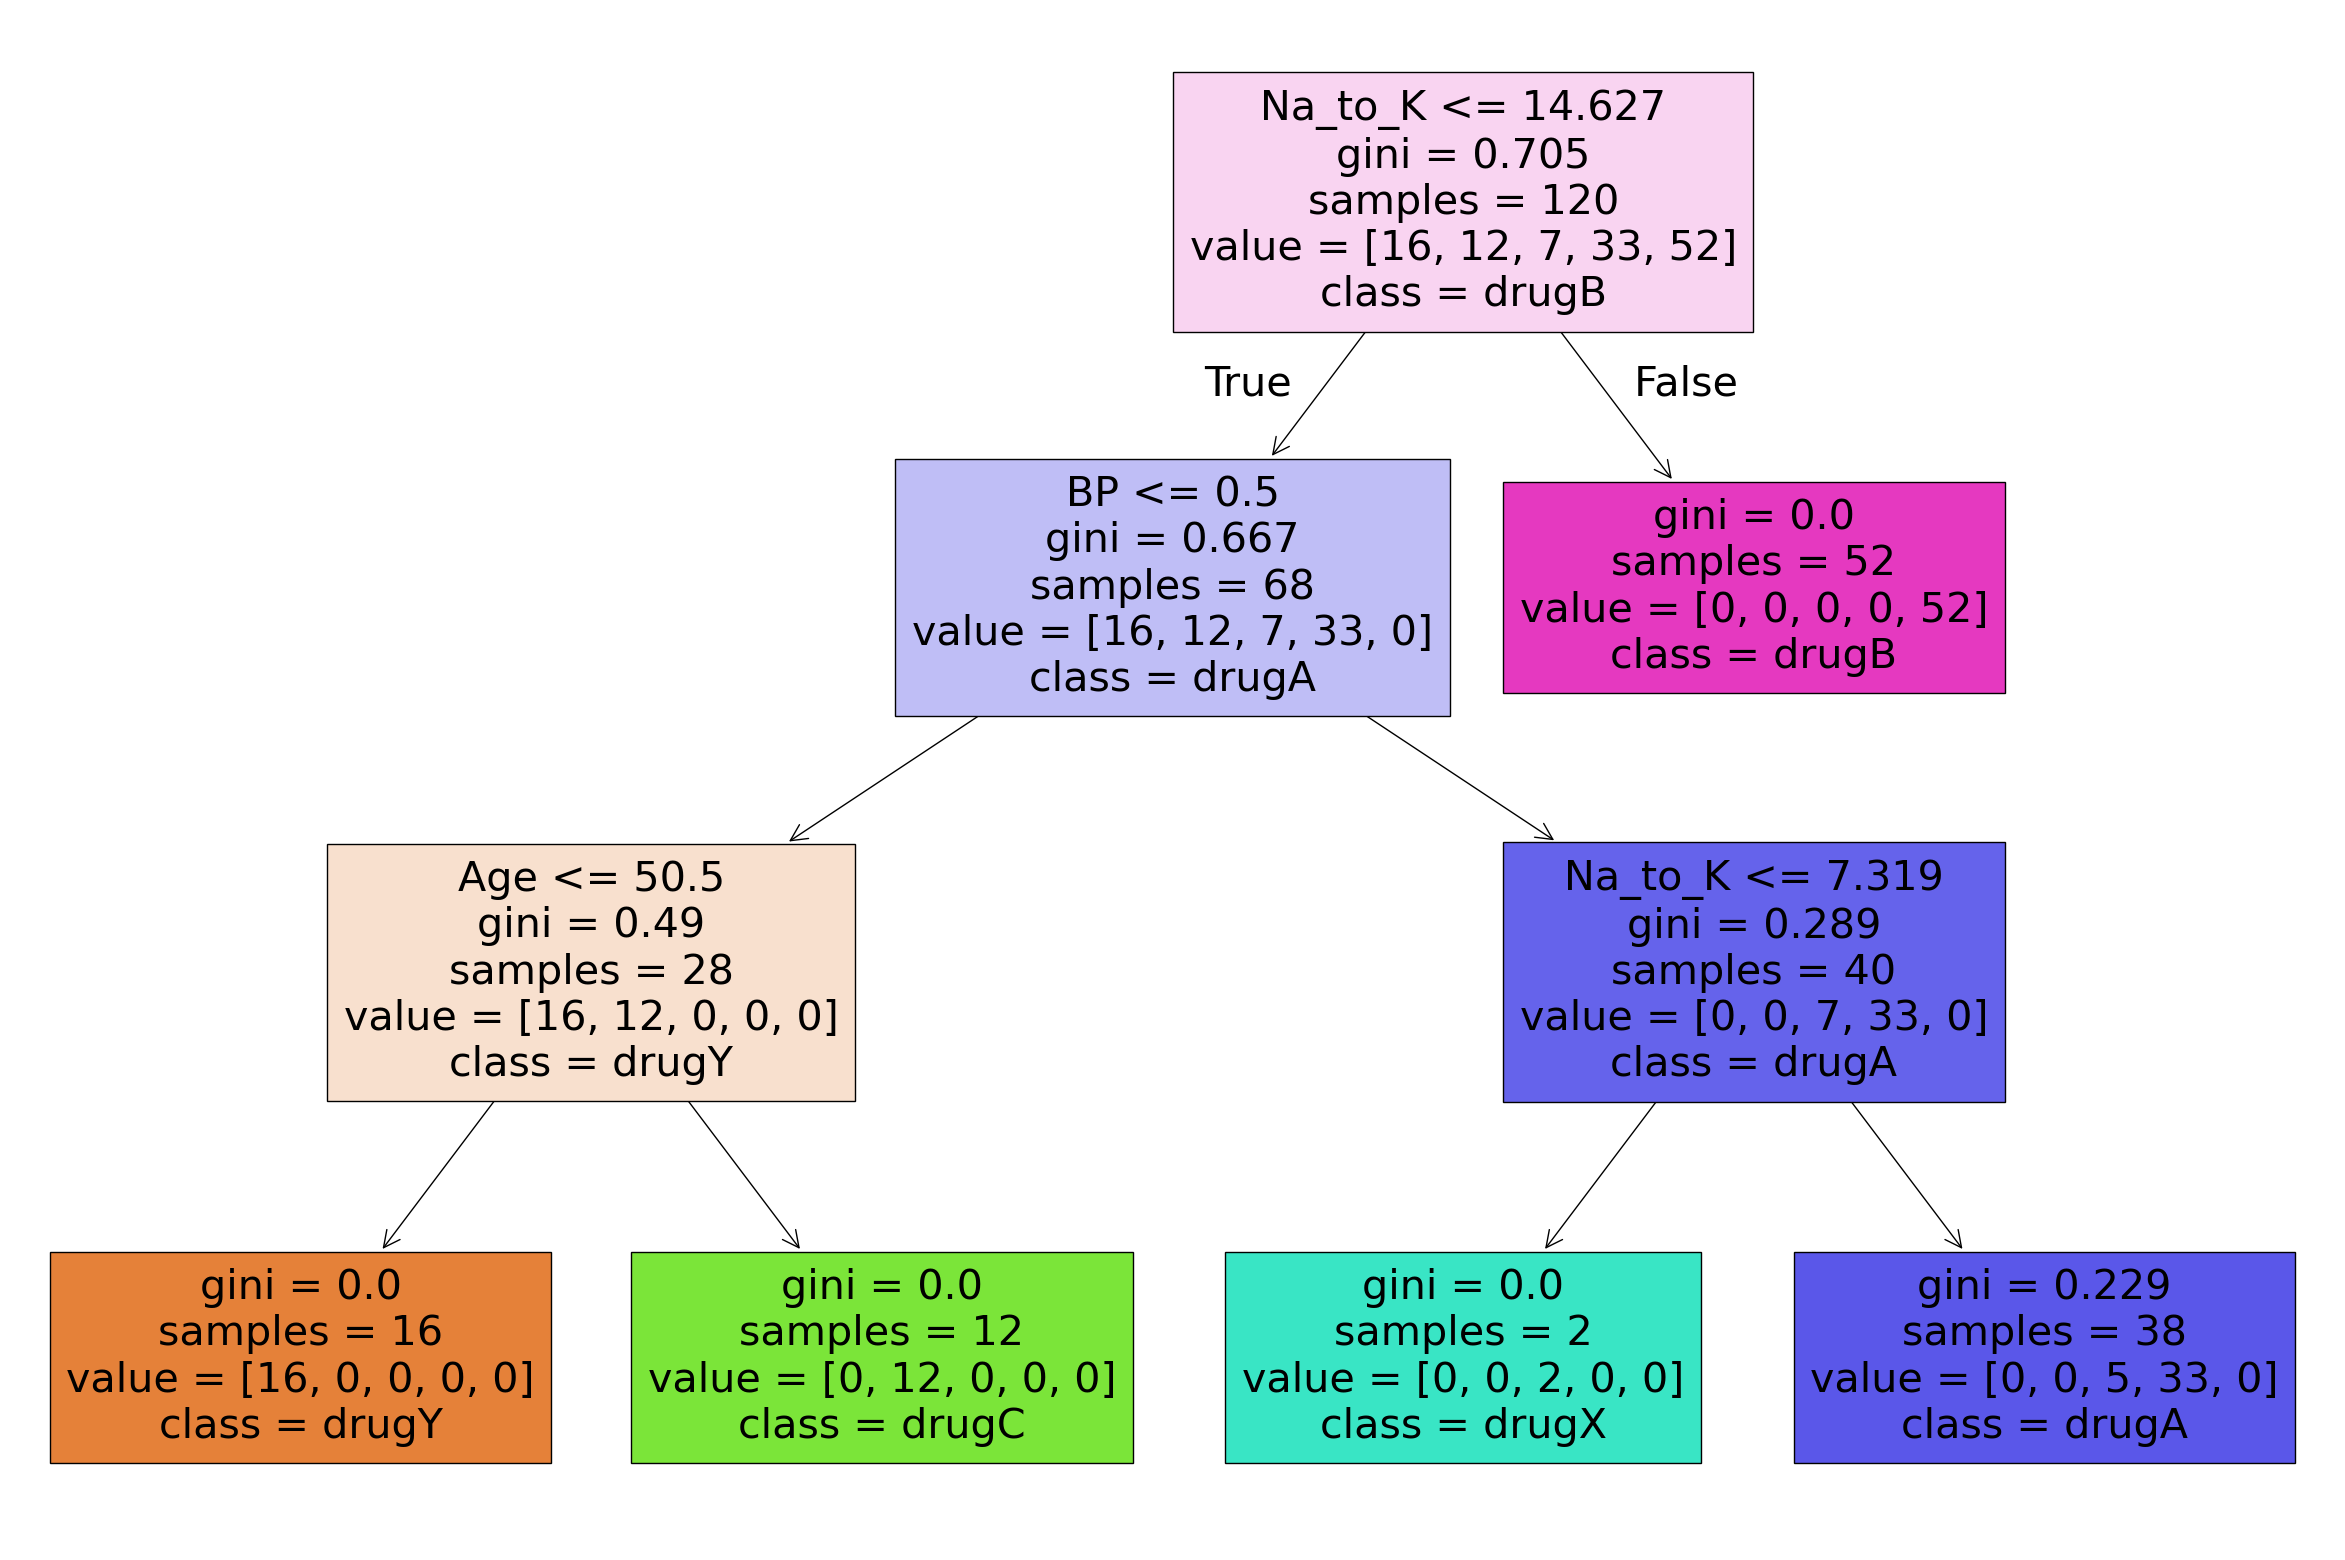

0.8375


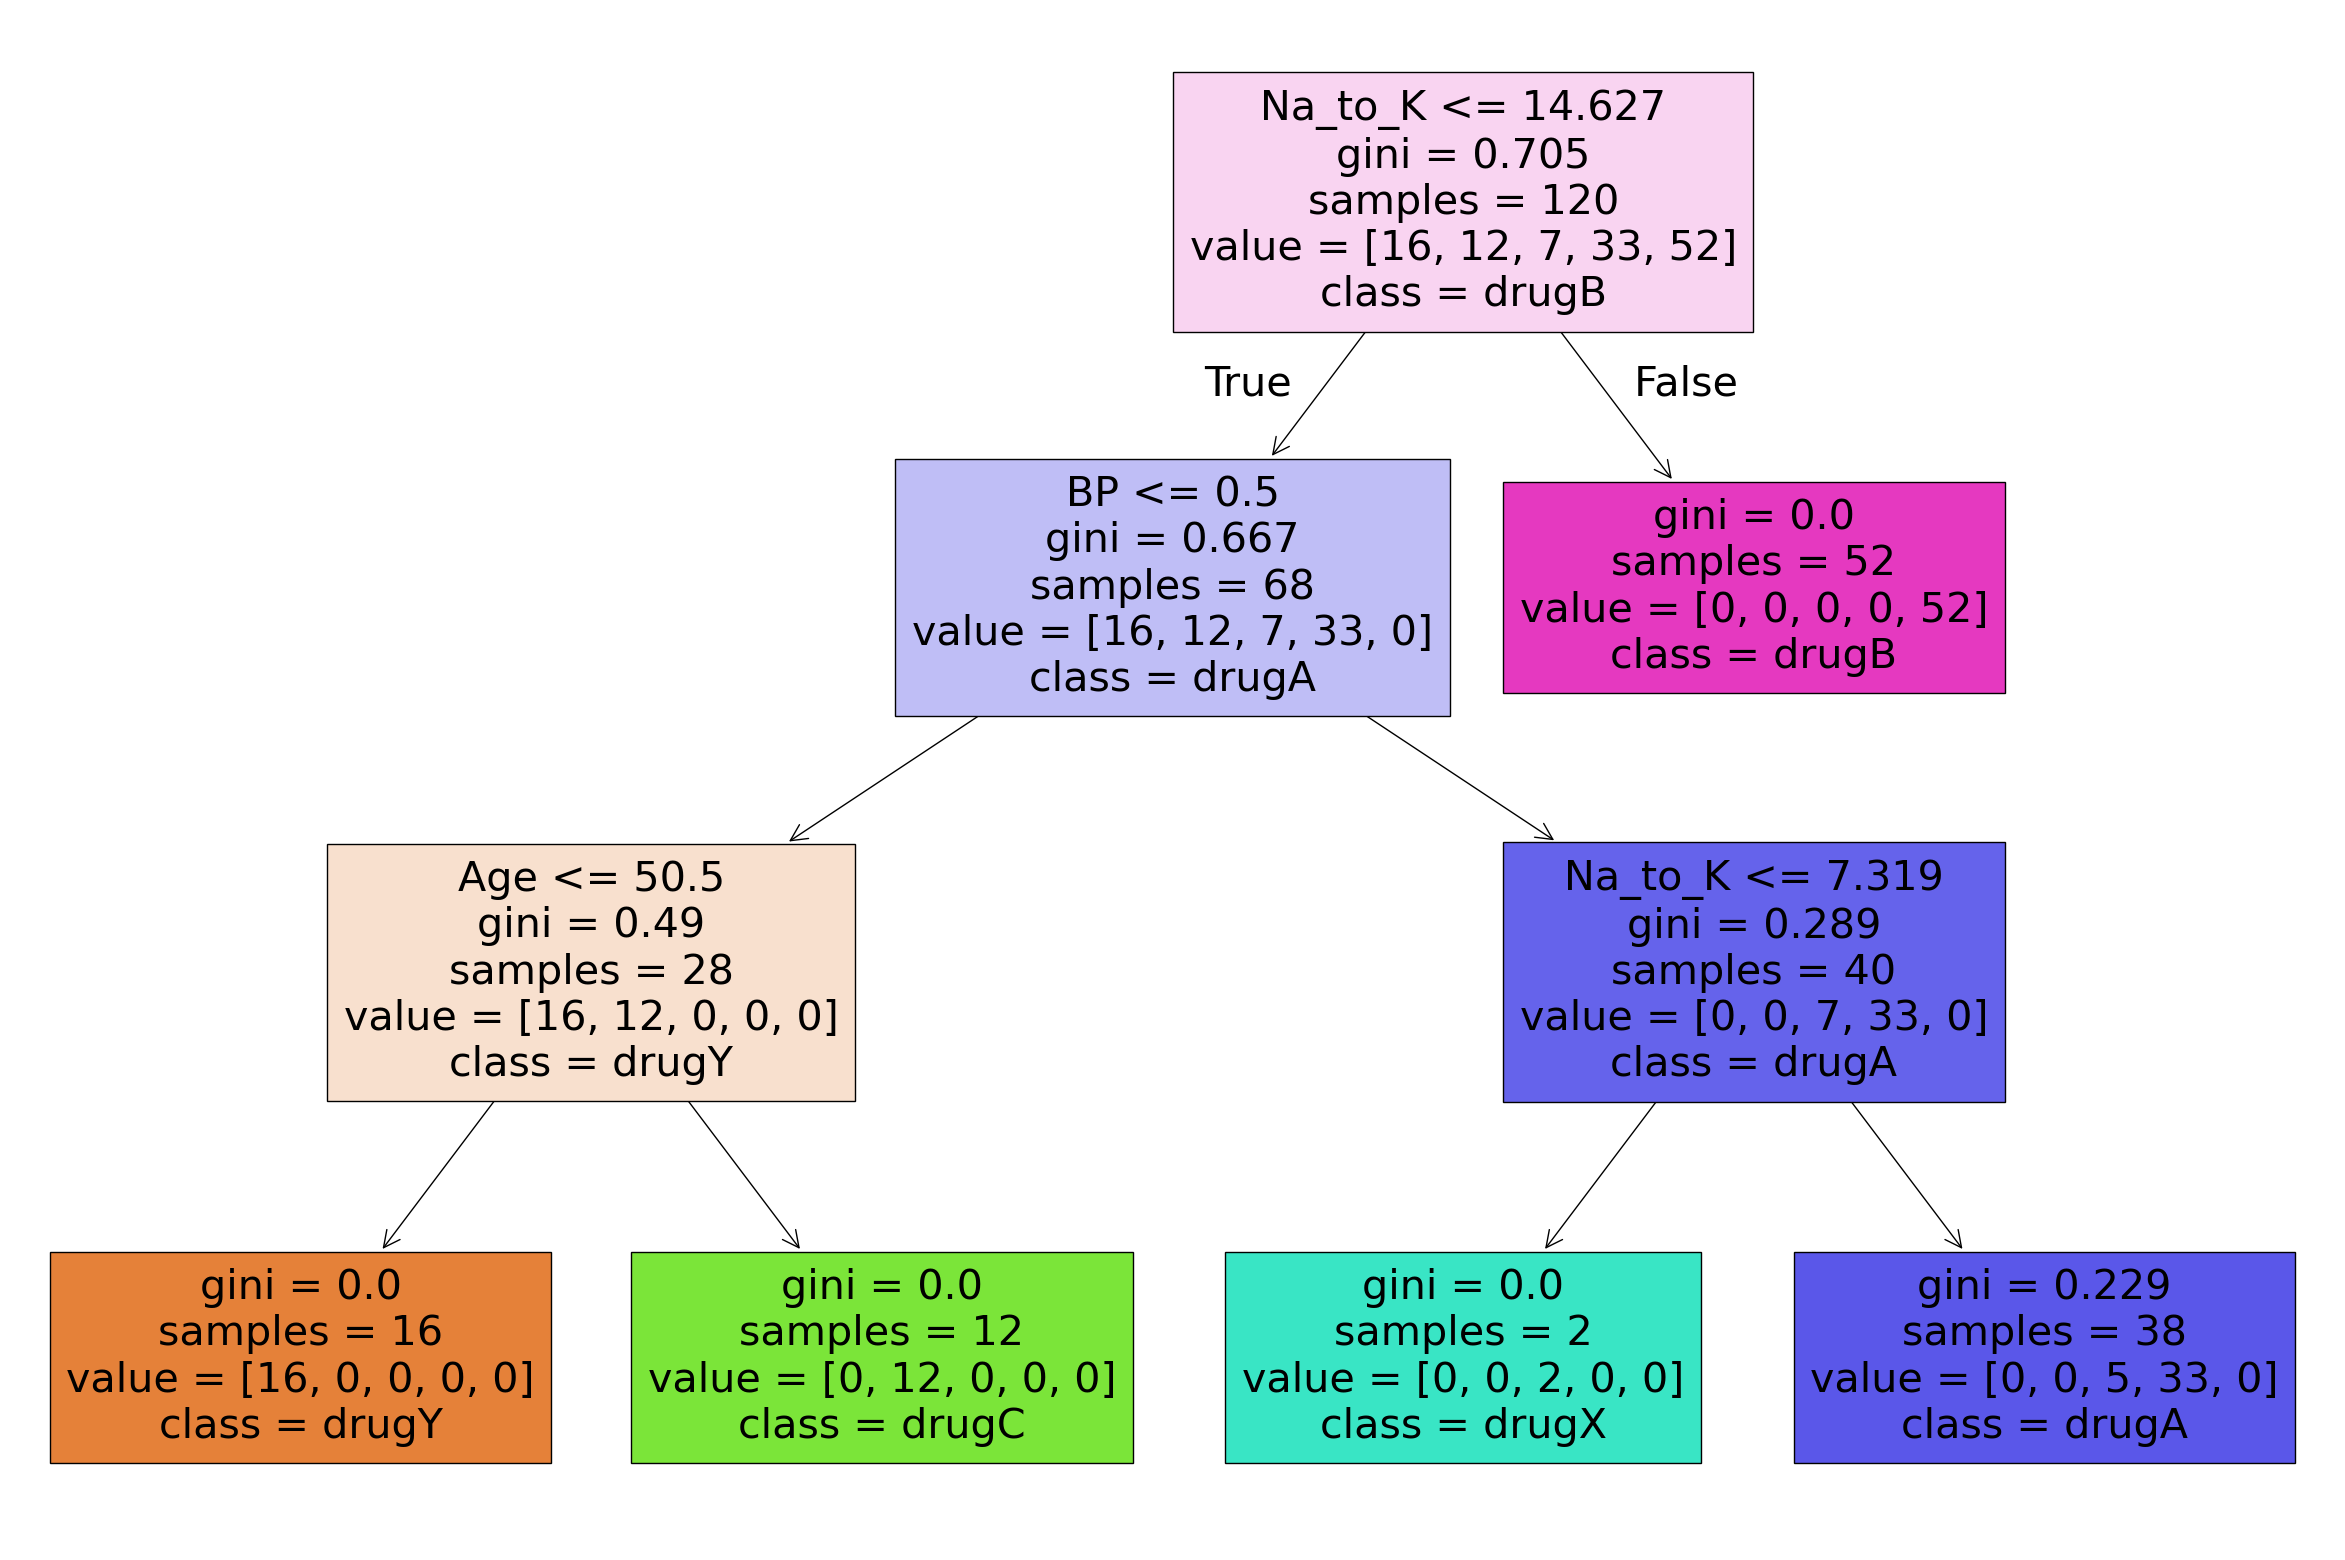

0.875


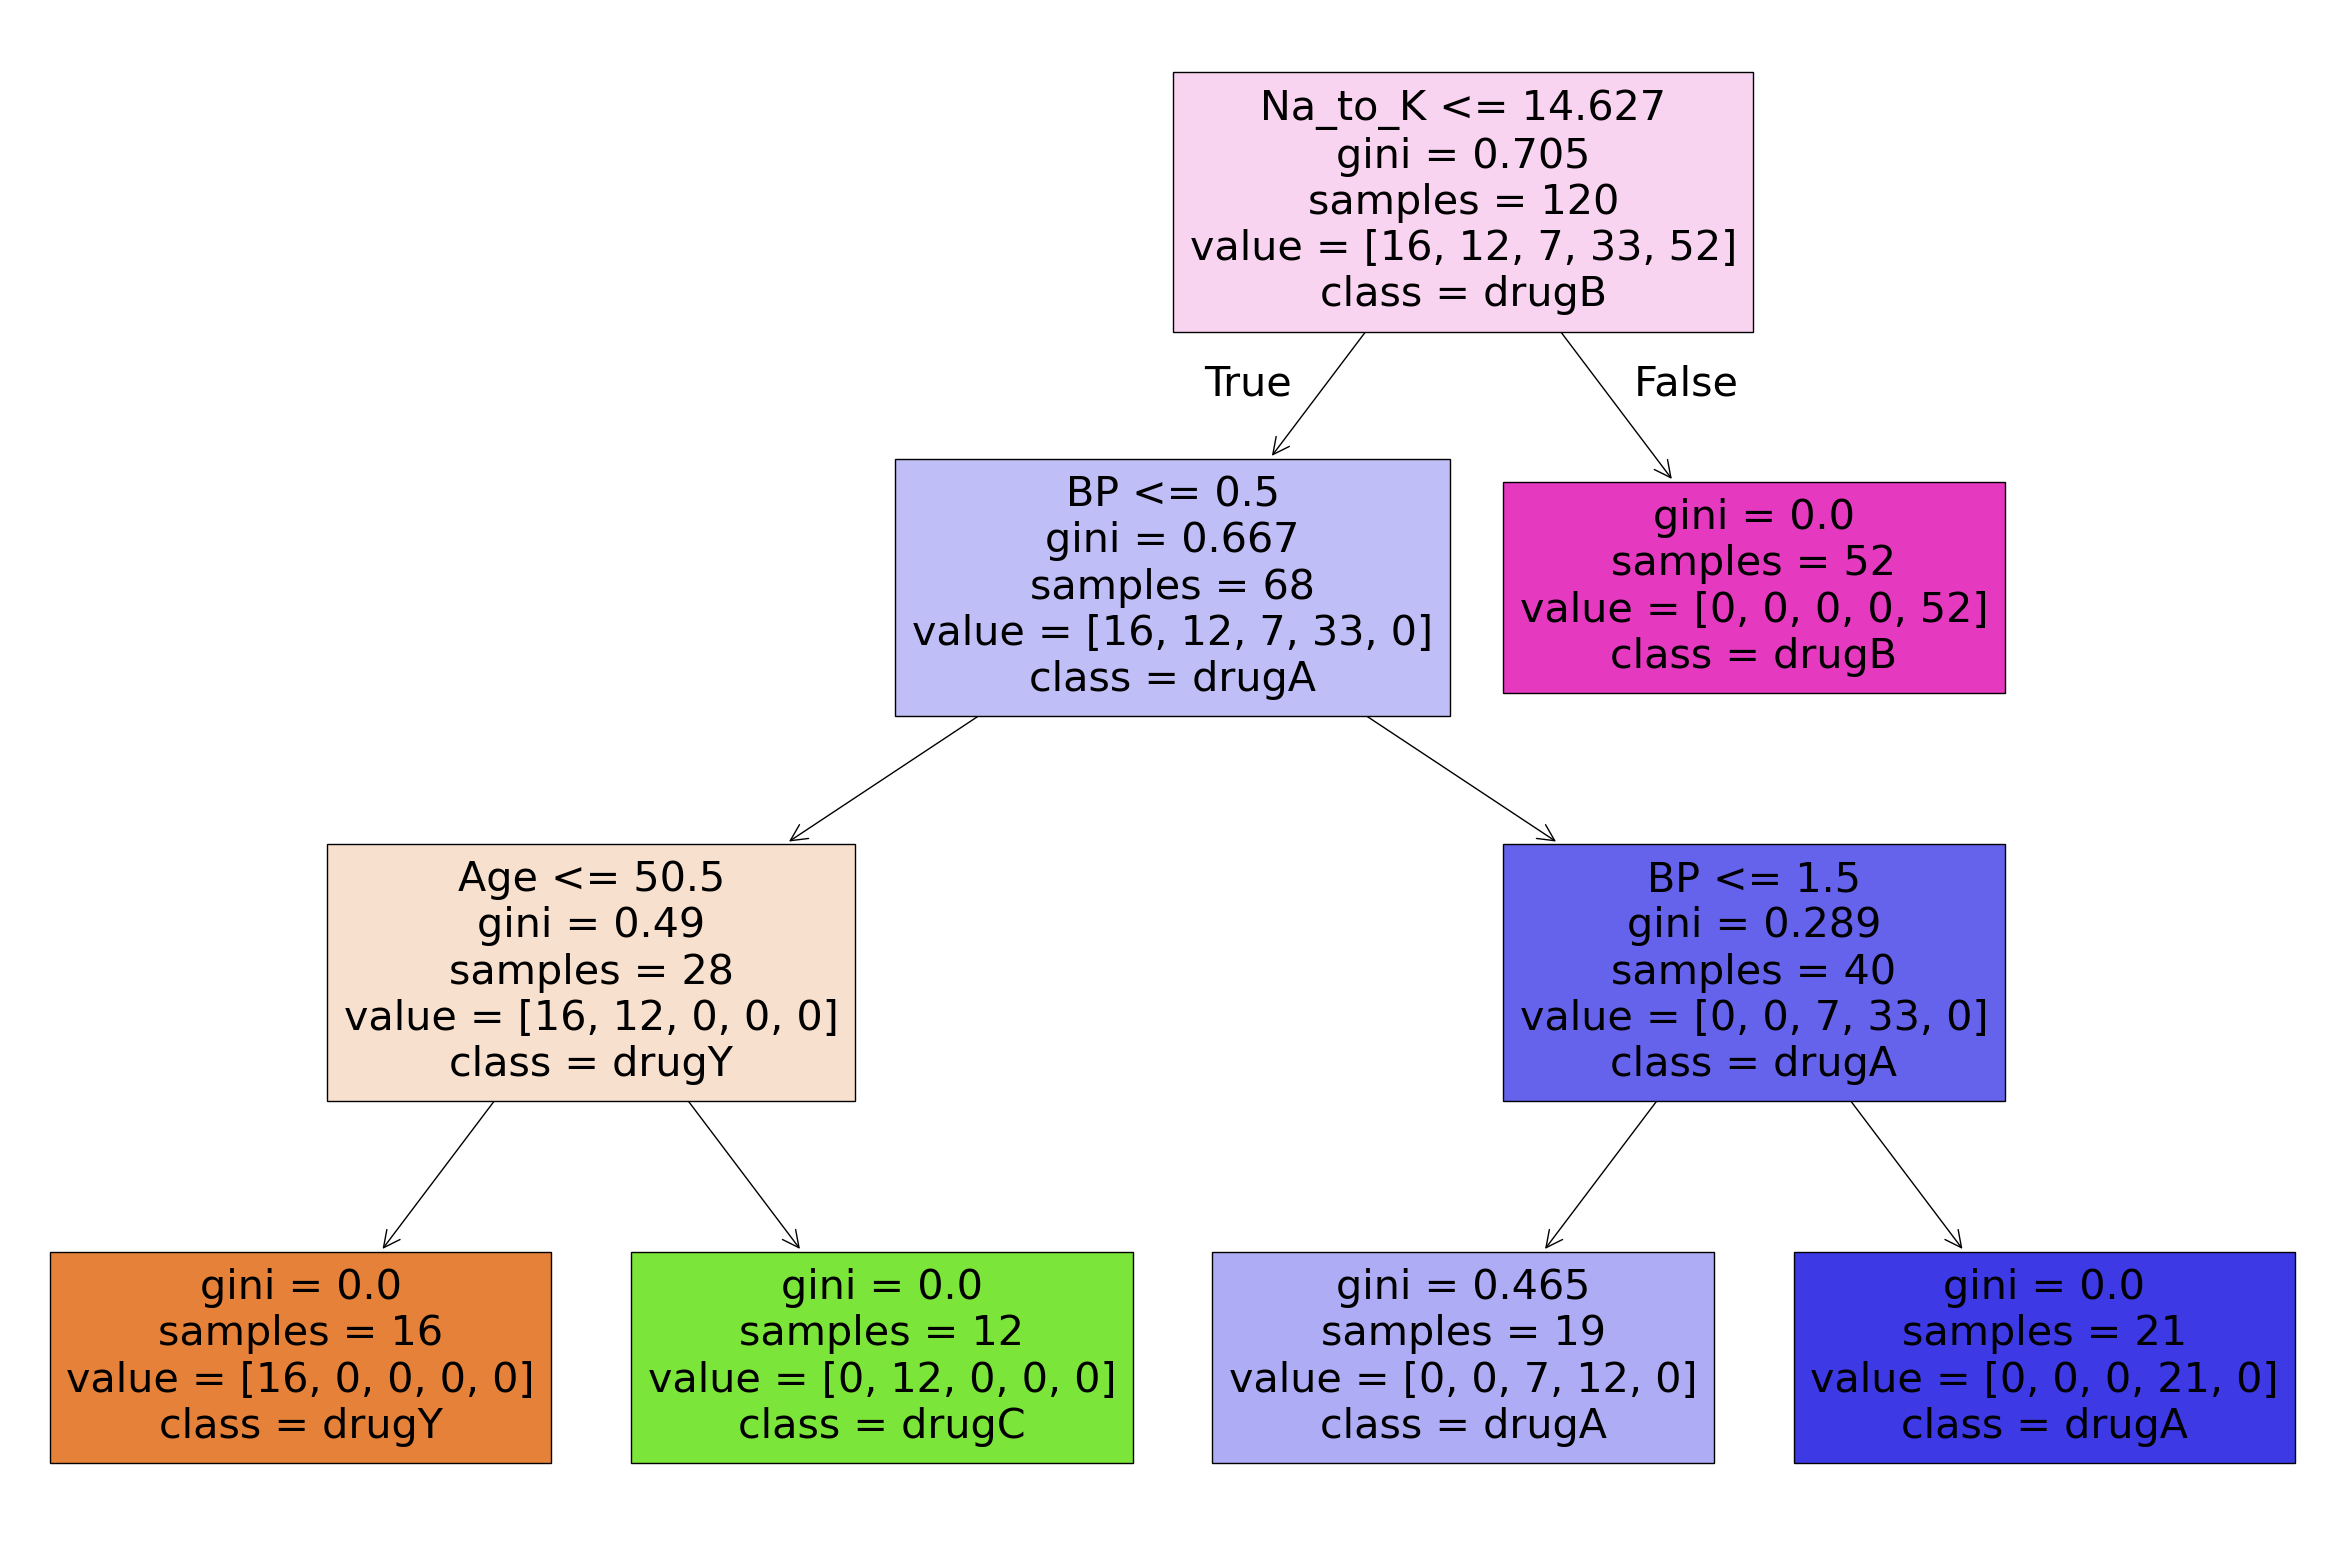

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         9
       drugX       1.00      0.95      0.98        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

Random Forest's Accuracy:  0.9875


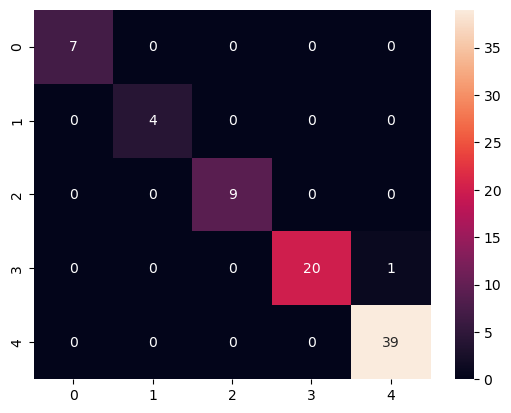

In [2]:
# 1
tree_model=DecisionTreeClassifier(min_impurity_decrease=0.02)
tree_model.fit(X_train,y_train)
y_predict=tree_model.predict(X_test)
print(accuracy_score(y_test,y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model,feature_names=cols,class_names=classes,filled=True)
plt.show()

# 2
tree_model=DecisionTreeClassifier(min_impurity_decrease=0,max_depth=3)
tree_model.fit(X_train,y_train)
y_predict=tree_model.predict(X_test)
print(accuracy_score(y_test,y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model,feature_names=cols,class_names=classes,filled=True)
plt.show()

# 3
tree_model=DecisionTreeClassifier(min_samples_leaf=5,min_impurity_decrease=0,max_depth=3)
tree_model.fit(X_train,y_train)
y_predict=tree_model.predict(X_test)
print(accuracy_score(y_test,y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model,feature_names=cols,class_names=classes,filled=True)
plt.show()



# Random Forest
rf_model = RandomForestClassifier(n_estimators=20)
rf_model.fit(X_train, y_train)
y_predict = rf_model.predict(X_test)

print(classification_report(y_test, y_predict))
print("Random Forest's Accuracy: ", accuracy_score(y_test, y_predict))

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()